In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

### Carregando dataset de validação

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

IMG_HEIGHT = 150
IMG_WIDTH = 150

BATCH_SIZE = 32

VALIDATION_DIR = '../processed_data/dataset_1_split/validation'


validation_datagen = ImageDataGenerator(
    rescale=1./255
)


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False              
)

class_names = list(validation_generator.class_indices.keys())

Found 411 images belonging to 16 classes.


### Carregando o modelo

In [5]:
import tensorflow as tf
try:
    model = tf.keras.models.load_model('modelo_otimizado.h5')
    print("Modelo carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o modelo: {e}")
    model = None

2025-06-25 09:00:39.995375: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-06-25 09:00:40.223904: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 09:00:40.242653: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-25 09:00:40.249644: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.


Modelo carregado com sucesso!


2025-06-25 09:00:40.518079: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.


### Visualização das camadas para um imagem aleatória

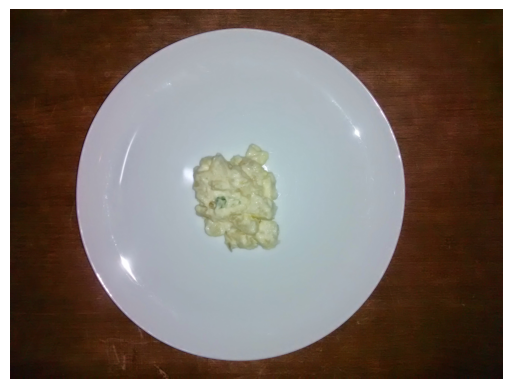

In [ ]:
import random
import matplotlib.pyplot as plt

#visualização da imagem selecionada aleatorimente
validation_dataset_len = len(validation_generator.filepaths)
random_img_index = random.randrange(0, validation_dataset_len)
img_path = validation_generator.filepaths[random_img_index]
img = tf.keras.utils.load_img(img_path)
plt.imshow(img)
plt.axis(False)
plt.show()

Visualizando ativações para a imagem: ../processed_data/dataset_1_split/validation/PureBatata/IMG_20140926_135543960.jpg (Classe: Alface)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


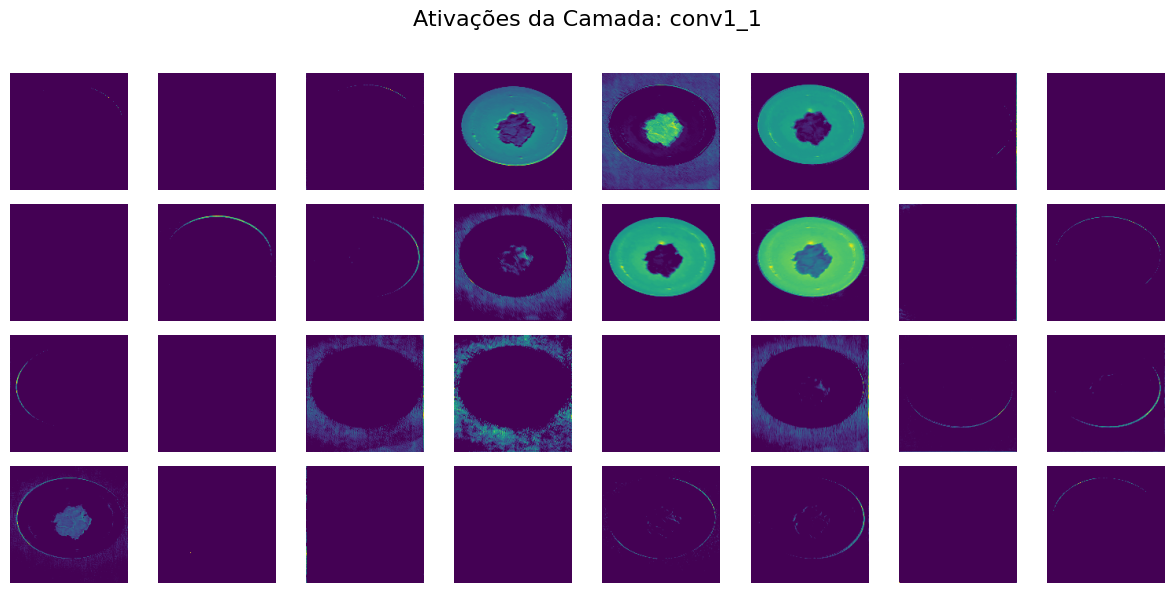

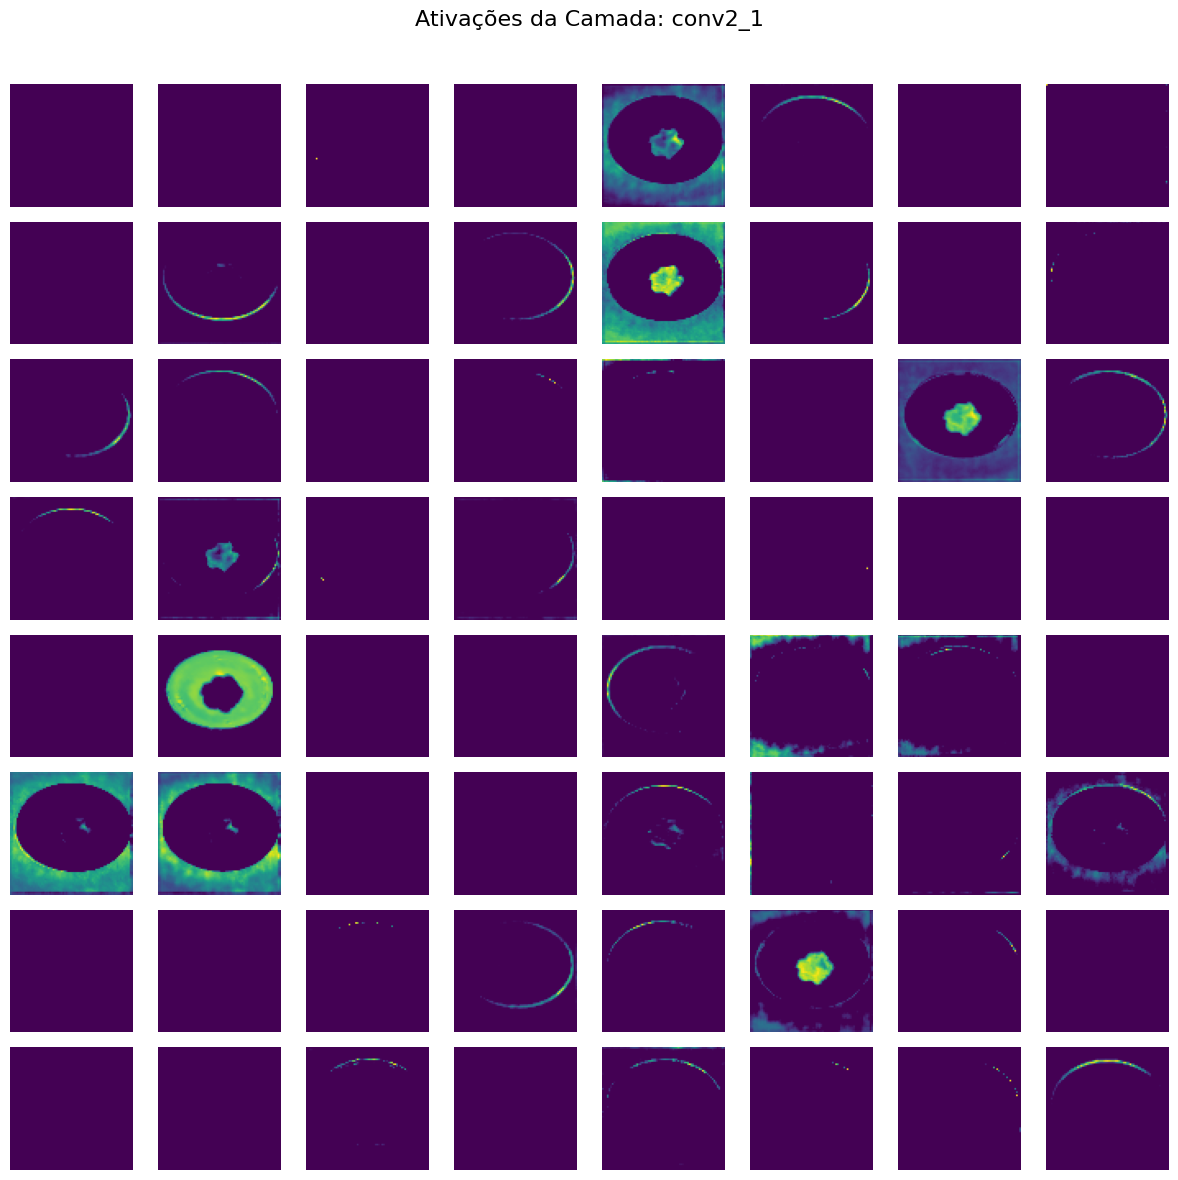

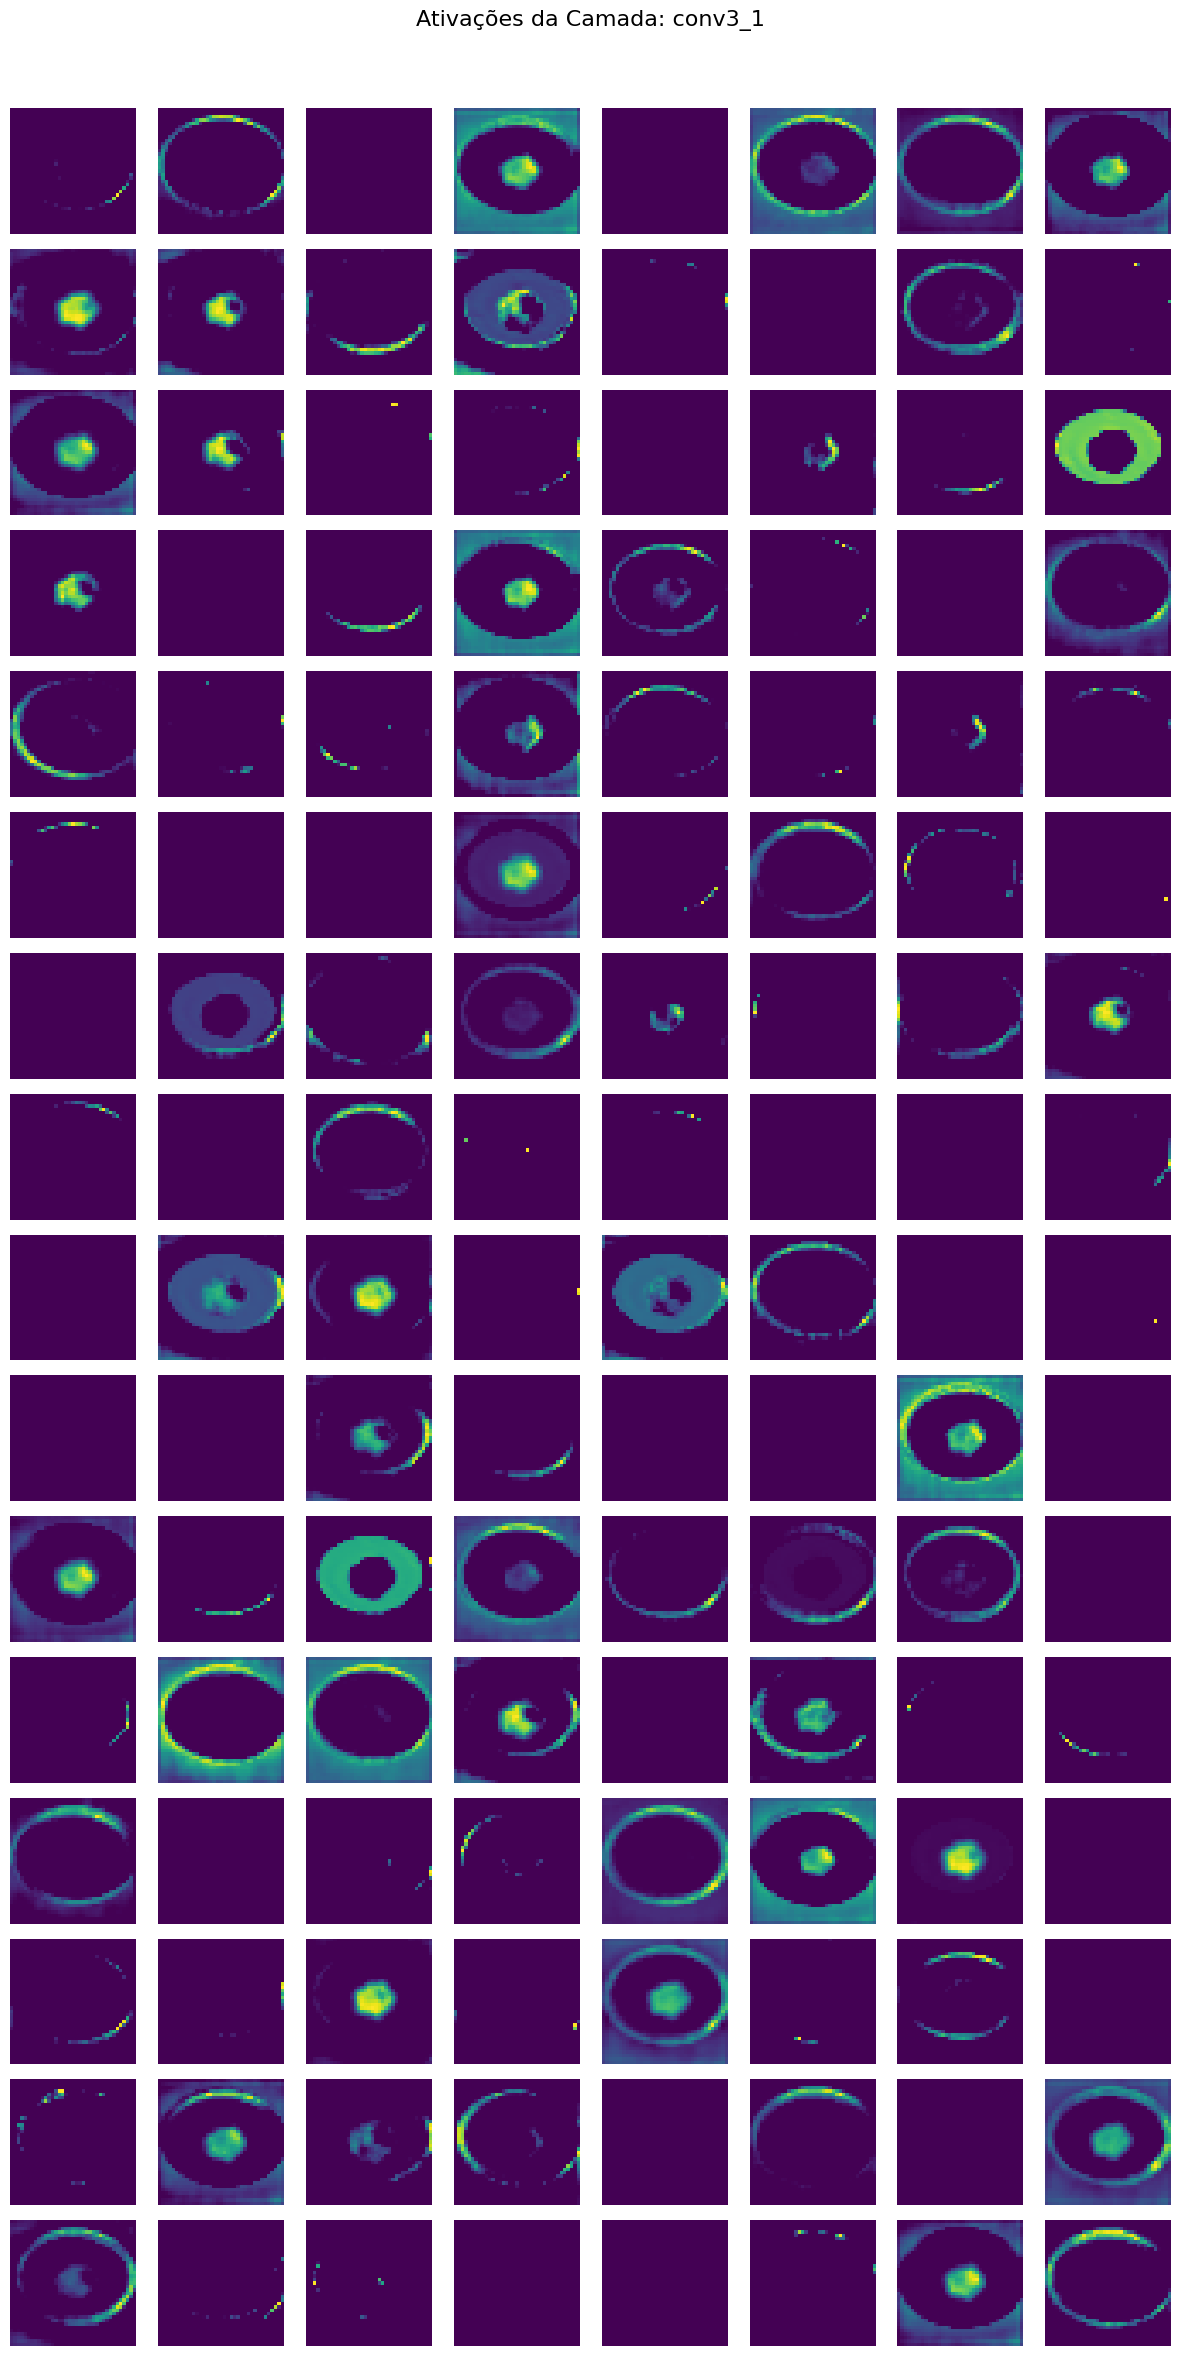

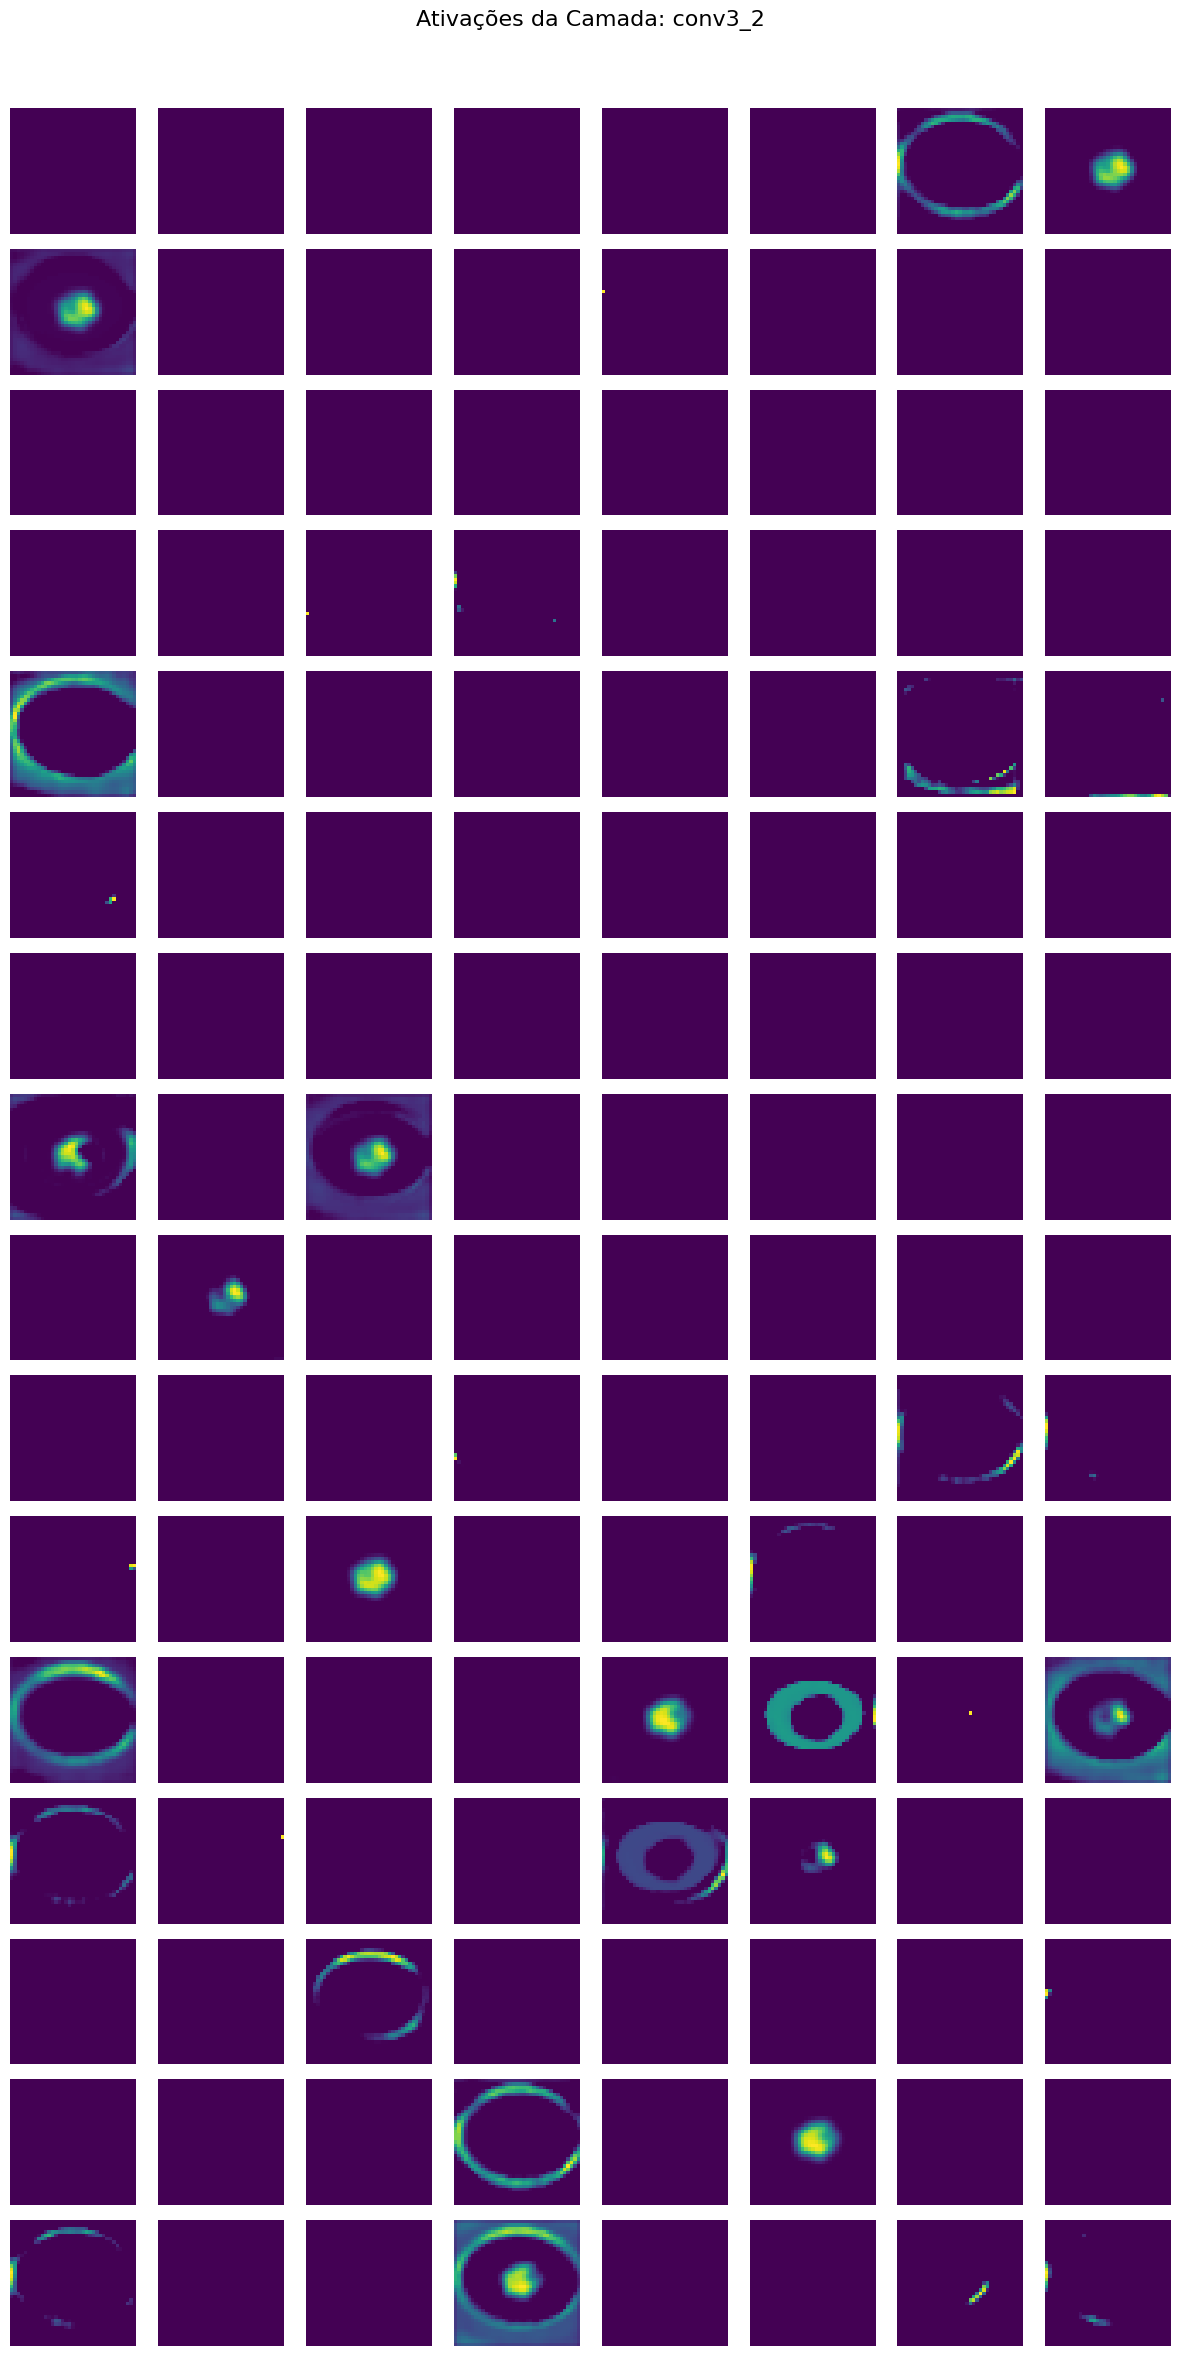

In [34]:
import numpy as np
import matplotlib.pyplot as plt

if model:
    true_label_name = class_names[validation_generator.classes[0]]
    print(f"Visualizando ativações para a imagem: {img_path} (Classe: {true_label_name})")

    # Pré-processa a imagem para alimentar o modelo
    img = tf.keras.utils.load_img(img_path, target_size=(150, 150))
    img_tensor = tf.keras.utils.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    # Extrai as saídas das camadas que queremos visualizar
    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

    # Cria um novo modelo que retorna as ativações dessas camadas
    visualization_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

    # Obtém as ativações ao passar a imagem pelo modelo
    activations = visualization_model.predict(img_tensor)

    # --- VISUALIZAÇÃO DAS ATIVAÇÕES ---

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        
        n_cols = 8
        n_rows = n_features // n_cols if n_features > 0 else 0
        
        if n_rows > 0:
            plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
            plt.suptitle(f'Ativações da Camada: {layer_name}', fontsize=16)

            for i in range(n_features):
                plt.subplot(n_rows, n_cols, i + 1)
                plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
                plt.axis('off')

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()